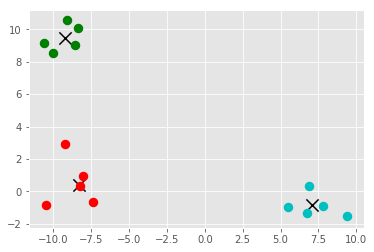

In [93]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
from sklearn.datasets.samples_generator import make_blobs


style.use('ggplot')


class MeanShift:
    def __init__(self, radius=None, radius_norm_step=100):
        self.radius = radius
        self.radius_norm_step = radius_norm_step
    
    def fit(self, data):
        if self.radius == None:
            all_data_centroid = np.average(data, axis=0)
            all_data_norm = np.linalg.norm(all_data_centroid)
            self.radius = all_data_norm / self.radius_norm_step
            
        centroids = {}
        
        for i in range(len(data)):
            centroids[i] = data[i]
        
        weights = [i for i in range(self.radius_norm_step)][::-1]  
        
        while True:
            new_centroids = []
            
            for i in centroids:
                in_bandwidth = []
                centroid = centroids[i]
                
                for feature_set in data:
                    distance = np.linalg.norm(feature_set - centroid)
                    
                    if distance == 0:
                        distance = 0.00000000001
                    
                    weight_index = int(distance / self.radius)
                    
                    if weight_index > self.radius_norm_step - 1:
                        weight_index = self.radius_norm_step - 1

                    to_add = (weights[weight_index] ** 2) * [feature_set]
                    in_bandwidth += to_add

                new_centroid = np.average(in_bandwidth, axis=0)
                new_centroids.append(tuple(new_centroid))

            uniques = sorted(list(set(new_centroids)))
            
            to_pop = []

            for i in uniques:
                if i in to_pop:
                    pass
                for ii in uniques:
                    if i == ii:
                        pass
                    elif np.linalg.norm(np.array(i)-np.array(ii)) <= self.radius and ii not in to_pop:
                        to_pop.append(ii)

            for i in to_pop:
                uniques.remove(i)

            previous_centroids = dict(centroids)
            centroids = {}
            
            for i in range(len(uniques)):
                centroids[i] = np.array(uniques[i])

            optimized = True

            for i in centroids:
                if not np.array_equal(centroids[i], previous_centroids[i]):
                    optimized = False
                
            if optimized:
                break
            
        self.centroids = centroids
        self.classifications = {}

        for i in range(len(self.centroids)):
            self.classifications[i] = []
            
        for featureset in data:
            distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
            classification = (distances.index(min(distances)))

            self.classifications[classification].append(featureset)
  
    def predict(self, data):
        distances = [np.linalg.norm(data - self.centroids[centroid]) for centroid in self.centroids]
        classification = (distances.index(min(distances)))
        return classification


X, y = make_blobs(n_samples=15, centers=3, n_features=2)
colors = 10 * ['g', 'r', 'c', 'b', 'k']

clf = MeanShift()
clf.fit(X)

centroids = clf.centroids

for classification in clf.classifications:
    color = colors[classification]
    
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker='o', color=color, s=20, linewidths=5, zorder=10)

for c in centroids:
    plt.scatter(centroids[c][0], centroids[c][1], color='k', marker='x', s=150, linewidths=5)

plt.show()
